In [1]:
# !pip install -q -r requirements.txt')
# !pip install -q stanza
from adjective_reading.parsing import *

In [2]:
odf = pd.DataFrame(iter_parsed_sents_stats('reading', limit=12_000))

 13%|█▎        | 9336/71902 [00:52<05:55, 176.22it/s]


In [142]:
odf2=odf.set_index(['url','sent_id','sent_str','id','head_id','label']).sort_index()
odf2

sent_repr  \
url                                        sent_id sent_str                                           id head_id label                                                                            
http://www.jstor.org/stable/10.1086/380806 6123    Doing so I promote a reading that, however tena... 6  4       obj(promote, reading)        Doing so I PROMOTE a READING that, however ten...   
                                                                                                         5       det(a, reading)              Doing so I promote A READING that, however ten...   
                                                                                                         14      acl:relcl(wrong, reading)    Doing so I promote a READING that, however ten...   
                                           6124    Such a reading advertises tantalizingly concret... 3  1       det:predet(Such, reading)    SUCH a READING advertises tantalizingly concre...   
                                                                                                         2       det(a, reading)              Such A READING advertises tantalizingly concre...   
...                                                                                                                                                                                         ...   
http://www.jstor.org/stable/823189         3009    It became apparent early on that unless the dep... 31 34      compound(skills, reading)    It became apparent early on that unless the de...   
http://www.jstor.org/stable/823270         4686    As we shall see, this point holds certain conse... 13 10      nmod(consequences, reading)  As we shall see, this point holds certain CONS...   
                                                                                                         11      case(for, reading)           As we shall see, this point holds certain cons...   
                                                                                                         12      det(any, reading)            As we shall see, this point holds certain cons...   
                                                                                                         17      nmod(poem, reading)          As we shall see, this point holds certain cons...   

                                                                                                                                                 head_text  \
url                                        sent_id sent_str                                           id head_id label                                       
http://www.jstor.org/stable/10.1086/380806 6123    Doing so I promote a reading that, however tena... 6  4       obj(promote, reading)             promote   
                                                                                                         5       det(a, reading)                         a   
                                                                                                         14      acl:relcl(wrong, reading)           wrong   
                                           6124    Such a reading advertises tantalizingly concret... 3  1       det:predet(Such, reading)            Such   
                                                                                                         2       det(a, reading)                         a   
...                                                                                                                                                    ...   
http://www.jstor.org/stable/823189         3009    It became apparent early on that unless the dep... 31 34      compound(skills, reading)          skills   
http://www.jstor.org/stable/823270         4686    As we shall see, this point holds certain conse... 13 10      nmod(consequences, reading)  consequences   
                                                                  

In [4]:
odf.drop_duplicates(subset=['url','sent_str','id','head_id'])

,url,sent_id,sent_str,sent_repr,id,head_id,head_text,head_rel,head_type,label,text
0,http://www.jstor.org/stable/461288,0,We are all our lifetime reading the copious se...,We are all our LIFETIME READING the copious se...,6,5,lifetime,acl,head,"acl(lifetime, reading)",reading
1,http://www.jstor.org/stable/461288,0,We are all our lifetime reading the copious se...,We are all our lifetime READING the copious SE...,6,9,sense,obj,dep,"obj(sense, reading)",reading
2,http://www.jstor.org/stable/40587680,1,This suggests the significance of logical proc...,This suggests the significance of logical proc...,29,26,one,acl:relcl,head,"acl:relcl(one, reading)",reading
3,http://www.jstor.org/stable/40587680,1,This suggests the significance of logical proc...,This suggests the significance of logical proc...,29,25,whether,mark,dep,"mark(whether, reading)",reading
4,http://www.jstor.org/stable/40587680,1,This suggests the significance of logical proc...,This suggests the significance of logical proc...,29,27,they,nsubj,dep,"nsubj(they, reading)",reading
...,...,...,...,...,...,...,...,...,...,...,...
30389,http://www.jstor.org/stable/1344089,11996,We need to go beyond a purely semiological rea...,We need to go beyond a purely semiological REA...,13,15,such,nmod,dep,"nmod(such, reading)",reading
30390,http://www.jstor.org/stable/1344089,11997,"In some cases, the inscription inside, reading...","In some cases, the INSCRIPTION inside, READING...",9,6,inscription,appos,head,"appos(inscription, reading)",reading
30391,http://www.jstor.org/stable/457186,11999,Thus a popular geste grew into a whole cycle o...,Thus a popular geste grew into a whole cycle o...,35,33,became,xcomp,head,"xcomp(became, reading)",reading
30392,http://www.jstor.org/stable/457186,11999,Thus a popular geste grew into a whole cycle o...,Thus a popular geste grew into a whole cycle o...,35,34,staple,amod,dep,"amod(staple, reading)",reading


In [5]:
url2year = {d['url']:d['publicationYear'] for d in orjsonl.stream(PATH_CORPUS)}
url2decade = {url:f"{year//10*10}-{year//10*10+9}" for url,year in url2year.items()}

from collections import defaultdict
decade2urls = defaultdict(list)
for url,decade in url2decade.items():
    decade2urls[decade].append(url)

# decade2urls

In [9]:
min(url2year.values())

1900

In [24]:
def periodize_3way(y):
    if y<1968:
        return '1920-1968'
    elif y<2000:
        return '1968-2000'
    else:
        return '2000-2018'

def periodize(y, cutoffs=[1920,1945,1970,1995], include_before=False, include_after=False):
    cutoffs.sort()
    mincut = cutoffs[0]
    maxcut = cutoffs[-1]
    if y < mincut:
        return f'{mincut}-{cutoffs[0]}' if include_before else f''
    elif y > maxcut:
        return f'{cutoffs[-1]}-' if include_after else f''

    for i in range(len(cutoffs)-1):
        if y < cutoffs[i+1]:
            return f'{cutoffs[i]}-{cutoffs[i+1]}'
    return f'{cutoffs[-1]}-' if include_after else f''

    # if y < cutoffs[0]:
    #     return f'{cutoffs[0]}-{cutoffs[1]}  '
    # elif y < cutoffs[1]:
    #     return f'{cutoffs[1]}-{cutoffs[2]}'
    # elif y < cutoffs[2]:
    #     return f'{cutoffs[2]}-{cutoffs[3]}'
    # else:
    #     return f'{cutoffs[3]}-{cutoffs[4]}'


# odf['year'] = odf['url'].map(url2year)
# odf['decade'] = odf['year'] // 10 * 10
# odf['period'] = odf['year'].map(periodize)


In [28]:
periodize(2020, cutoffs=[1920, 1950, 1980, 2000, 2020])

''

In [54]:
PERIOD_CUTOFFS = [1920, 1960, 1980, 1990, 2000, 2010, 2020]

odf['period'] = odf['year'].map(lambda y: periodize(y, cutoffs=PERIOD_CUTOFFS))
odf.query('period!=""').period.value_counts().sort_index()

period
1920-1960    4017
1960-1980    4380
1980-1990    5203
1990-2000    6124
2000-2010    5214
2010-2020    4614
Name: count, dtype: int64

In [55]:
odfx = odf.query('period!=""')

In [58]:
odfx.groupby('period').label.value_counts().sort_values(ascending=False)
# !pip install -q networkx

period     label                  
1990-2000  det(a, reading)            244
1920-1960  det(the, reading)          204
1990-2000  case(of, reading)          200
1980-1990  det(a, reading)            197
2000-2010  det(a, reading)            191
                                     ... 
1980-1990  nmod(Coloss, Reading)        1
           nmod(Cranes, Reading)        1
           nmod(Creek, Reading)         1
           nmod(Dante, reading)         1
2010-2020  xcomp(visible, reading)      1
Name: count, Length: 15807, dtype: int64

In [47]:
# !pip install -q networkx
import networkx as nx

def get_graph(df):
    G = nx.Graph()
    for i,row in df.iterrows():
        text,head=row['text'].lower(), row['head_text'].lower()
        rel = row['head_rel'].lower()
        if rel in {'case','det'}:
            continue

        if not G.has_node(text):
            G.add_node(text,node_type='text')
        if not G.has_node(rel):
            G.add_node(rel,node_type='rel')
        if not G.has_node(head):
            G.add_node(head,node_type='head')

        label = row['label']

        for x,y in ((text,rel), (rel,head)):
            if not G.has_edge(x, y):
                G.add_edge(x, y, weight=1)
            else:
                G[x][y]['weight'] += 1

    edges_to_remove = [e for e in G.edges() if G[e[0]][e[1]]['weight'] < 2]
    G.remove_edges_from(edges_to_remove)

    nodes_to_remove = [n for n in G.nodes() if G.degree(n) < 1]
    G.remove_nodes_from(nodes_to_remove)
    G.order(), G.size()
    return G

In [48]:
dec2G={}
for dec,decdf in odf.groupby('period'):
    G = get_graph(decdf)
    dec2G[dec] = G

In [49]:
for dec,G in dec2G.items():
    print(dec,G.order(), G.size())
    
    break

 94 98


In [50]:
def draw_graph(G):
    import matplotlib.pyplot as plt

    # Create the layout for the graph
    pos = nx.spring_layout(G, k=0.5, iterations=50)

    # Separate nodes by type
    text_nodes = [n for n in G.nodes() if G.nodes[n].get('node_type') == 'text']
    rel_nodes = [n for n in G.nodes() if G.nodes[n].get('node_type') == 'rel']
    head_nodes = [n for n in G.nodes() if G.nodes[n].get('node_type') == 'head']

    # Create figure
    plt.figure(figsize=(14, 10))

    # Draw nodes by type with different colors
    nx.draw_networkx_nodes(G, pos, nodelist=text_nodes, node_size=700, 
                        node_color='lightblue', alpha=0.9, label='Text')
    nx.draw_networkx_nodes(G, pos, nodelist=rel_nodes, node_size=700, 
                        node_color='lightcoral', alpha=0.9, label='Relation')
    nx.draw_networkx_nodes(G, pos, nodelist=head_nodes, node_size=700, 
                        node_color='lightgreen', alpha=0.9, label='Head')

    # Draw edges with varying width based on weight
    edges = G.edges()
    weights = [G[u][v]['weight'] for u, v in edges]
    max_weight = max(weights) if weights else 1

    # Draw edges with width proportional to weight
    nx.draw_networkx_edges(G, pos, width=[w/max_weight * 10 + 1 for w in weights], alpha=0.6)

    # Draw labels for nodes
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    # Draw edge labels showing weights
    edge_labels = {(u, v): f"({G[u][v]['weight']})" 
                for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)

    plt.title("Dependency Graph with Edge Weights (Colored by Node Type)", fontsize=16)
    plt.legend(scatterpoints=1, loc='upper right')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

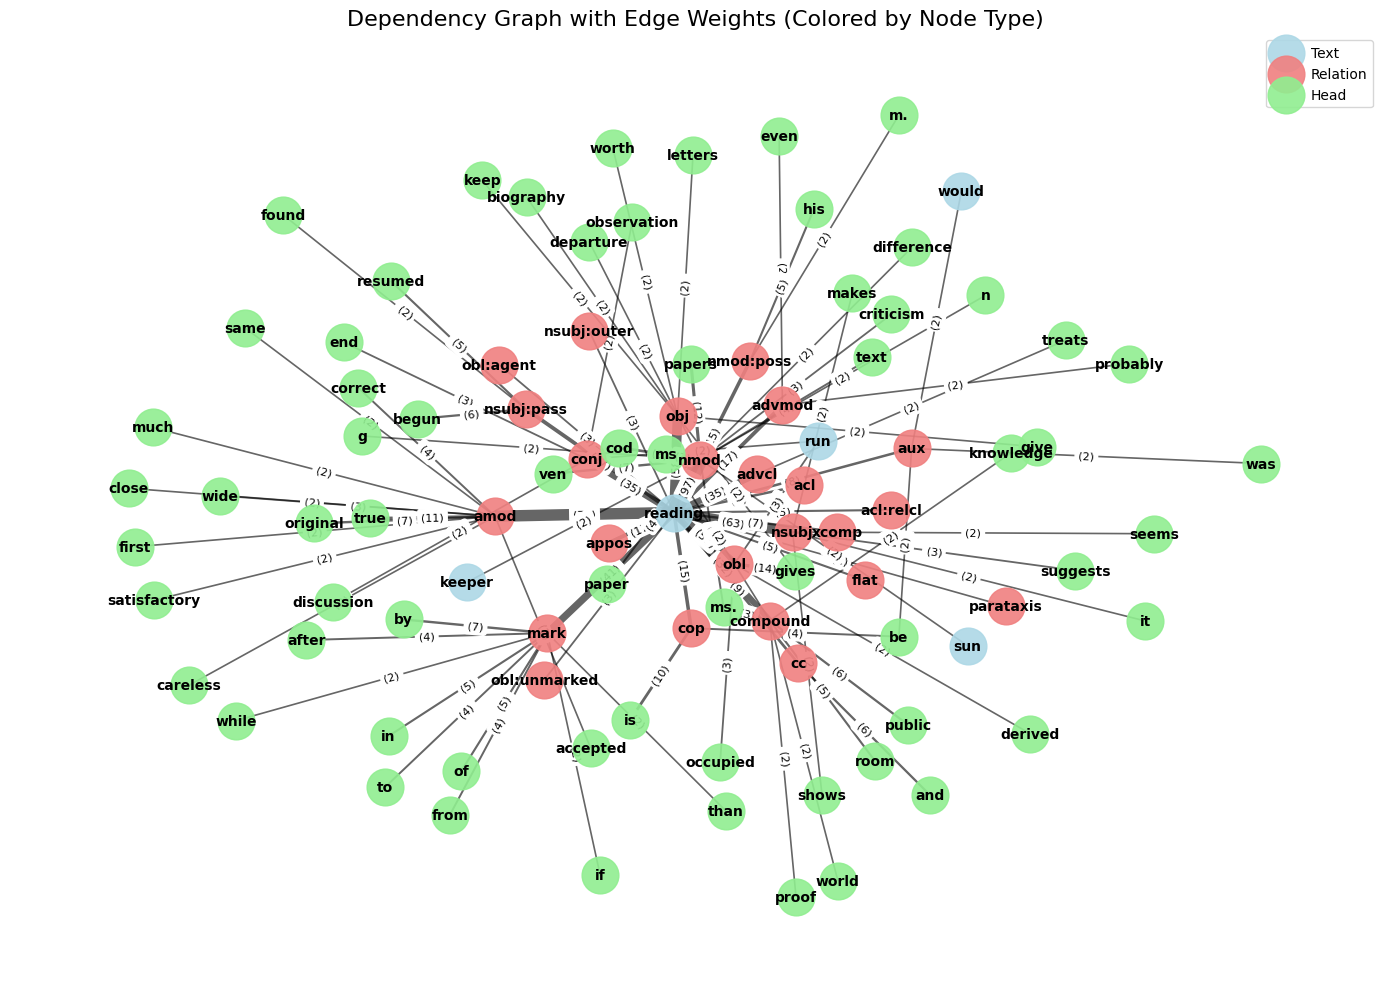

In [51]:
draw_graph(G)

In [15]:

# Draw a networkx graph in jupyter notebook with python that shows weight


In [16]:
# odf.head_rel.value_counts()

In [17]:
triples = odf.label.str.lower().tolist()
# triples

In [53]:
from collections import Counter
counts = Counter(triples)

In [54]:
counts.most_common(25)

[('det(the, reading)', 31),
 ('det(a, reading)', 20),
 ('case(of, reading)', 13),
 ('mark(of, reading)', 11),
 ('cop(is, reading)', 9),
 ('det(this, reading)', 8),
 ('mark(in, reading)', 6),
 ('case(with, reading)', 6),
 ('cc(and, reading)', 6),
 ('case(to, reading)', 6),
 ('nmod:poss(my, reading)', 5),
 ('nmod:poss(his, reading)', 5),
 ('amod(original, reading)', 5),
 ('case(in, reading)', 4),
 ('compound(race, reading)', 4),
 ('case(by, reading)', 3),
 ('nmod(lines, reading)', 3),
 ('nsubj(this, reading)', 3),
 ('amod(correct, reading)', 3),
 ('conj(writing, reading)', 3),
 ('case(from, reading)', 3),
 ('nmod:poss(our, reading)', 3),
 ('nmod:poss(her, reading)', 3),
 ('case(for, reading)', 3),
 ('compound(proof, reading)', 3)]

In [ ]:
# odf2.query("head_rel=='amod'")